In [23]:
import pandas as pd
import ast
import numpy as np


df = pd.read_csv("TRADES_CopyTr_90D_ROI.csv")


def parse_trade_history(entry):
    try:
        return ast.literal_eval(entry)  
    except (ValueError, SyntaxError):
        return None


df['Trade_History'] = df['Trade_History'].dropna().apply(parse_trade_history)


def calculate_metrics(trades):
    if not isinstance(trades, list):  
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    
    profits = [t['realizedProfit'] for t in trades if 'realizedProfit' in t]
    total_profit = sum(profits)
    initial_investment = sum([t['quantity'] for t in trades if 'quantity' in t])
    
   
    roi = (total_profit / initial_investment) * 100 if initial_investment else 0
    
 
    returns = np.diff(profits) if len(profits) > 1 else [0]
    sharpe_ratio = np.mean(returns) / np.std(returns) if np.std(returns) != 0 else 0
    

    if len(profits) > 1 and np.max(profits) > 0:
        peak = np.maximum.accumulate(profits)
        with np.errstate(divide='ignore', invalid='ignore'):  
            drawdowns = np.where(peak > 0, (peak - profits) / peak, 0)
        max_drawdown = np.nanmax(drawdowns) if len(drawdowns) > 0 else 0
    else:
        max_drawdown = 0  

    
    
    win_positions = sum(1 for p in profits if p > 0)
    total_positions = len(profits)
    win_rate = (win_positions / total_positions) * 100 if total_positions > 0 else 0
    
    return roi, total_profit, sharpe_ratio, max_drawdown, win_rate, win_positions


df[['ROI', 'PnL', 'Sharpe_Ratio', 'MDD', 'Win_Rate', 'Win_Positions']] = df['Trade_History'].apply(lambda x: pd.Series(calculate_metrics(x)))
df['Total_Positions'] = df['Trade_History'].apply(lambda x: len(x) if isinstance(x, list) else 0)



df['Score'] = (df['ROI'] * 0.4) + (df['PnL'] * 0.3) + (df['Sharpe_Ratio'] * 0.2) - (df['MDD'] * 0.1)

df_sorted = df.sort_values(by='Score', ascending=False)


df_sorted.head(20).to_csv("Top_20_Accounts.csv", index=False)


df_sorted.head(20)


,Port_IDs,Trade_History,ROI,PnL,Sharpe_Ratio,MDD,Win_Rate,Win_Positions,Total_Positions,Score
16,3936410995029308417,"[{'time': 1716230296000, 'symbol': 'BTCUSDT', ...",1.791054,10681.514000,2.367458e-18,1.000000,30.000000,6.0,20,3205.070622
14,3941019213896463617,"[{'time': 1718959940000, 'symbol': 'BTCUSDT', ...",0.489283,4234.087790,1.277881e-17,7.337984,49.107143,55.0,112,1269.688252
5,4030555430101054209,"[{'time': 1718900988000, 'symbol': 'ETHUSDT', ...",0.668880,3358.380320,0.000000e+00,1.000000,26.446281,32.0,121,1007.681648
6,4036548677626662656,"[{'time': 1718960181000, 'symbol': 'ETHUSDT', ...",0.561686,3296.876680,-6.248326e-04,1.000000,46.258503,68.0,147,989.187553
0,4023697881318718465,"[{'time': 1718641182000, 'symbol': 'DOGEUSDT',...",3.307649,3151.950620,-5.783313e-02,1.000000,8.571429,6.0,70,946.796679
1,4031451549482615297,"[{'time': 1718985618000, 'symbol': 'ORDIUSDT',...",1.042455,3124.541215,3.072535e-18,1.561202,38.596491,44.0,114,937.623226
2,4033639786957934336,"[{'time': 1718964015000, 'symbol': 'BTCUSDT', ...",0.707493,2848.141857,-4.535499e-18,1.000000,16.778523,25.0,149,854.625554
9,3981810242465907713,"[{'time': 1717170748000, 'symbol': 'ETHUSDT', ...",1.105643,2836.472830,8.150987e-03,1.000000,11.428571,12.0,105,851.285736
3,4029422834086627072,"[{'time': 1718781210000, 'symbol': 'ETHUSDT', ...",1.297831,2799.902550,-2.087098e-02,1.000000,37.254902,38.0,102,840.385723
4,4030565764341697025,"[{'time': 1718981010000, 'symbol': 'ORDIUSDT',...",0.870983,2789.878290,-6.214616e-18,1.036224,48.571429,51.0,105,837.208258


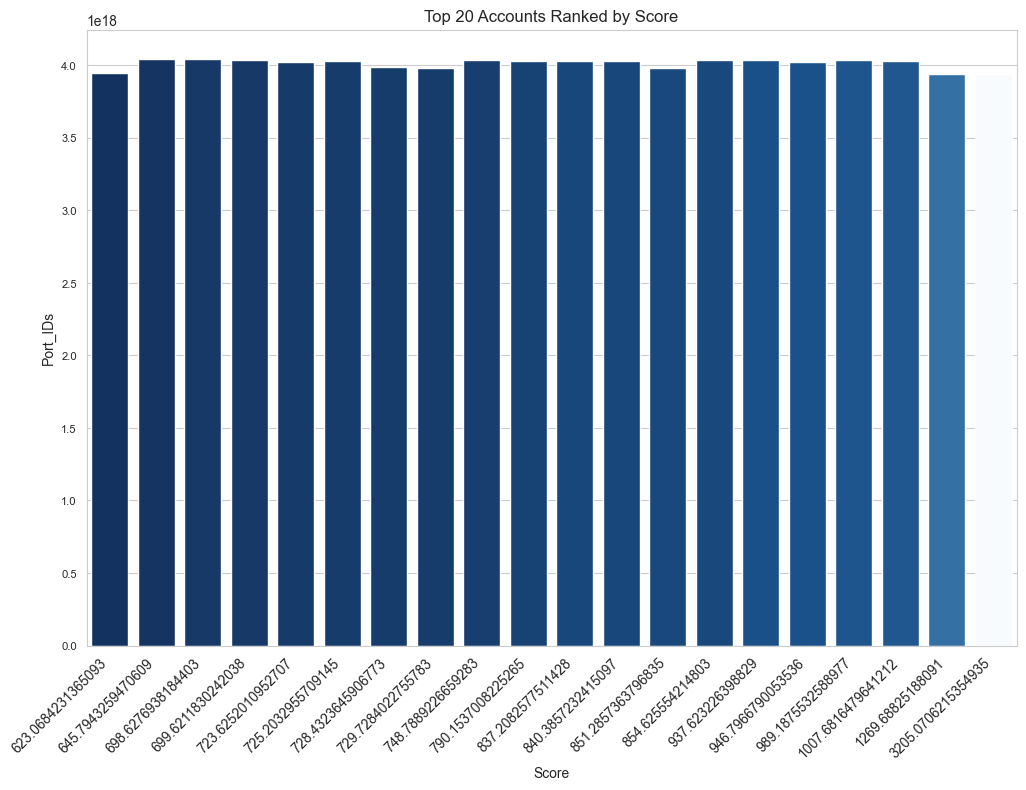

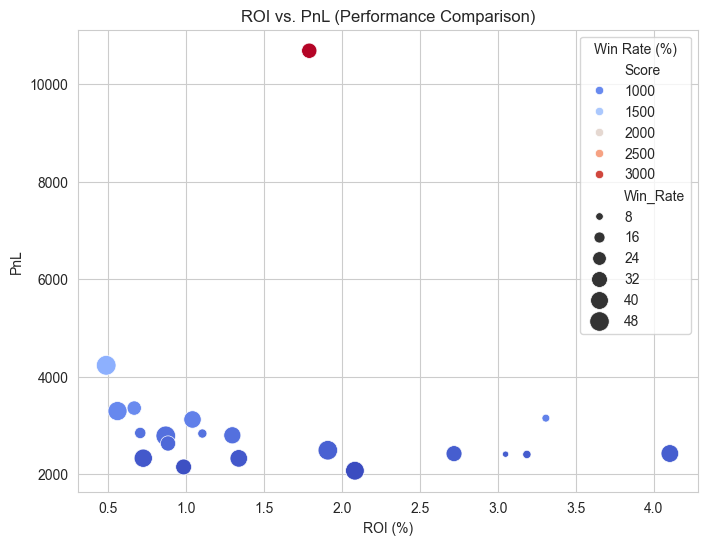

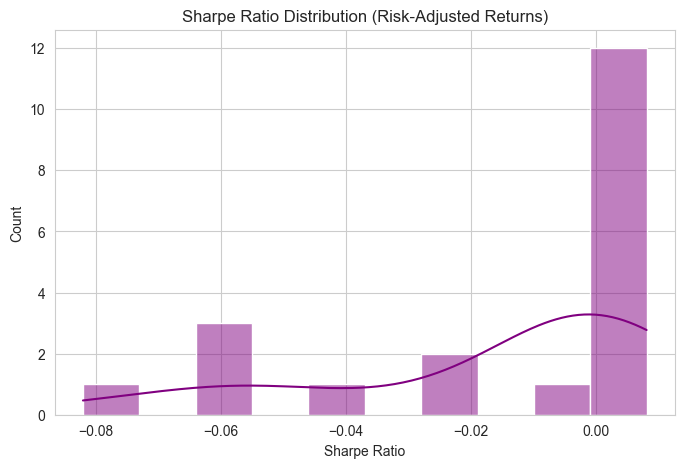

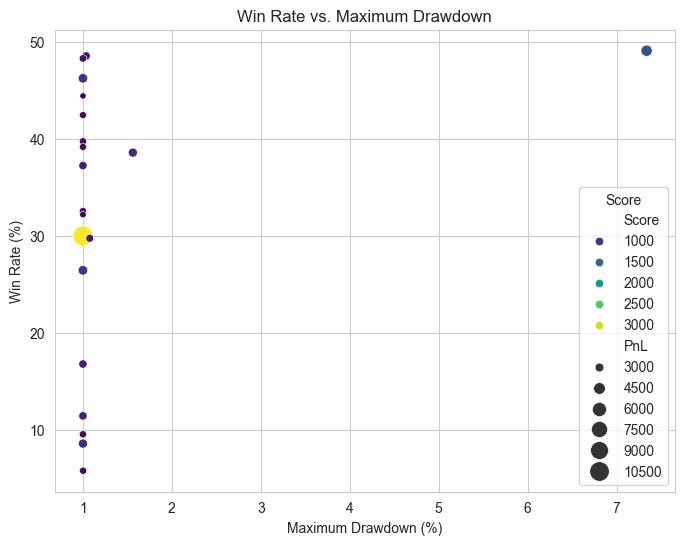

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

top_20_path = "Top_20_Accounts.csv"
df = pd.read_csv(top_20_path)

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))  
sns.barplot(x=df['Score'], y=df['Port_IDs'], hue=df['Score'], palette="Blues_r", dodge=False, legend=False)

plt.xlabel("Score")
plt.ylabel("Port_IDs")
plt.title("Top 20 Accounts Ranked by Score")

plt.xticks(rotation=45, ha='right')  
plt.yticks(fontsize=8) 

plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['ROI'], y=df['PnL'], hue=df['Score'], size=df['Win_Rate'], palette="coolwarm", sizes=(20, 200))
plt.xlabel("ROI (%)")
plt.ylabel("PnL")
plt.title("ROI vs. PnL (Performance Comparison)")
plt.legend(title="Win Rate (%)")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['Sharpe_Ratio'], bins=10, kde=True, color="purple")
plt.xlabel("Sharpe Ratio")
plt.title("Sharpe Ratio Distribution (Risk-Adjusted Returns)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['MDD'], y=df['Win_Rate'], hue=df['Score'], size=df['PnL'], palette="viridis", sizes=(20, 200))
plt.xlabel("Maximum Drawdown (%)")
plt.ylabel("Win Rate (%)")
plt.title("Win Rate vs. Maximum Drawdown")
plt.legend(title="Score")
plt.show()


In [21]:
from IPython.display import display, HTML

resume_link = "https://drive.google.com/file/d/1kRpk5MG8NpWFStluHYxUXaUXRXgAGF7v/view?usp=sharing"
linkedin_link = "https://www.linkedin.com/in/nitesh-gautam-03a680236/"

html_code = f"""

<p><strong>Nitesh Gautam </strong> - Data Analyst & AI/ML Developer</p>
<p>📄 <a href='{resume_link}' target='_blank'>View My Resume</a></p>
<p>🔗 <a href='{linkedin_link}' target='_blank'>LinkedIn Profile</a></p>
"""

display(HTML(html_code))
